#### Importando pacotes e baixando banco de dados disponibilizado pela CVM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


#### Lendo os arquivos csv e interpretando

In [2]:
pd.set_option("display.max_columns", None)

df1 = pd.read_csv('.\Banco_de_dados\IM_Classes_230626_semNP.csv')
df2 = pd.read_csv('.\Banco_de_dados\IM_230626_semNP.csv')

C:\Users\Inteli\AppData\Local\Temp\ipykernel_15076\3694956524.py:4: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('.\Banco_de_dados\IM_230626_semNP.csv')


In [3]:
df1 = df1.dropna().drop_duplicates()
df2 = df2.dropna().drop_duplicates()

#### Separação de Features

In [4]:
Colunas_1_Quero = ['SK_Documento', 'Numero_Cotistas']


In [5]:
Colunas_2_Quero = ['SK_Documento', 'CNPJ_Administrador', 'Nome_Administrador', 'Nome_Fundo',
                   'Fundo_Exclusivo', 'Ativo', 'Ativo_Carteira', 'Ativo_Direitos_Aquisicao', 
                   'Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes', 'Ativo_Direitos_Aquisicao_Creditos_Inadimplentes', 'Ativo_Direitos_Sem_Aquisicao',
                   'Ativo_Direitos_Sem_Aquisicao_Creditos_Vencer_Adimplentes', 
                   'Ativo_Direitos_Sem_Aquisicao_Creditos_Vencer_Inadimplentes', 
                   'Ativo_Valores_Mobiliarios', 'Patrimonio_Liquido', 'Liquidez_Ate_30_Dias', 
                   'Liquidez_Ate_60_Dias', 'Liquidez_Ate_90_Dias', 'Liquidez_Ate_180_Dias', 'Liquidez_Ate_360_Dias',
                   'Liquidez_Acima_360_Dias','Carteira', 'Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes', 
                   'Ativo_Direitos_Aquisicao_Creditos_Inadimplentes','Ativo_Direitos_Aquisicao_Creditos_Vencer_Inadimplentes',"Carteira_Direitos_Aquisicao_Inadimplentes","Data_Competencia"
                   ]

In [6]:
todas_colunas2 = list(df2.columns)
for coluna in todas_colunas2:
    if coluna not in Colunas_2_Quero:
        df2 = df2.drop(coluna,axis=1)

In [7]:
todas_colunas1 = list(df1.columns)
for coluna in todas_colunas1:
    if coluna not in Colunas_1_Quero:
        df1 = df1.drop(coluna,axis=1)

#### Merge

In [8]:
df1 = df1.groupby("SK_Documento").mean()

Fazendo mais um tratamento das features

In [9]:
df = pd.merge(df1,df2, on='SK_Documento', how="right")

In [10]:
df["Data_Competencia"] = pd.to_datetime(df["Data_Competencia"], format='%Y-%m-%d')

In [11]:
df = df.drop("Nome_Administrador",axis=1)
df = df.drop("CNPJ_Administrador",axis=1)
df = df.drop("SK_Documento",axis=1)
df = df.drop("Nome_Fundo",axis=1)

Fazendo o calculo do VR

In [12]:
df["Valor_em_Risco"] = df["Carteira_Direitos_Aquisicao_Inadimplentes"]/df["Patrimonio_Liquido"]

In [13]:
df['Liquidez_curtoPrazo'] = df['Liquidez_Ate_30_Dias'] + df['Liquidez_Ate_60_Dias']
df = df.drop(['Liquidez_Ate_30_Dias','Liquidez_Ate_60_Dias'],axis=1)
df['Liquidez_medioPrazo'] = df['Liquidez_Ate_90_Dias'] + df['Liquidez_Ate_180_Dias']
df = df.drop(['Liquidez_Ate_90_Dias','Liquidez_Ate_180_Dias'],axis=1)
df['Liquidez_longoPrazo'] = df['Liquidez_Ate_360_Dias'] + df['Liquidez_Acima_360_Dias']
df = df.drop(['Liquidez_Ate_360_Dias','Liquidez_Acima_360_Dias'],axis=1)

#### Transformando colunas categóricas em numéricas

In [14]:
df = pd.get_dummies(df, columns=['Fundo_Exclusivo'])


#### Criando novo DataFrame

In [15]:
Filtro1_df = pd.DataFrame(df)
Filtro1_df.to_csv('dados_tratados.csv', index=False)


#### Criando Gráficos

In [16]:
df.shape

(6622, 22)

<Axes: >

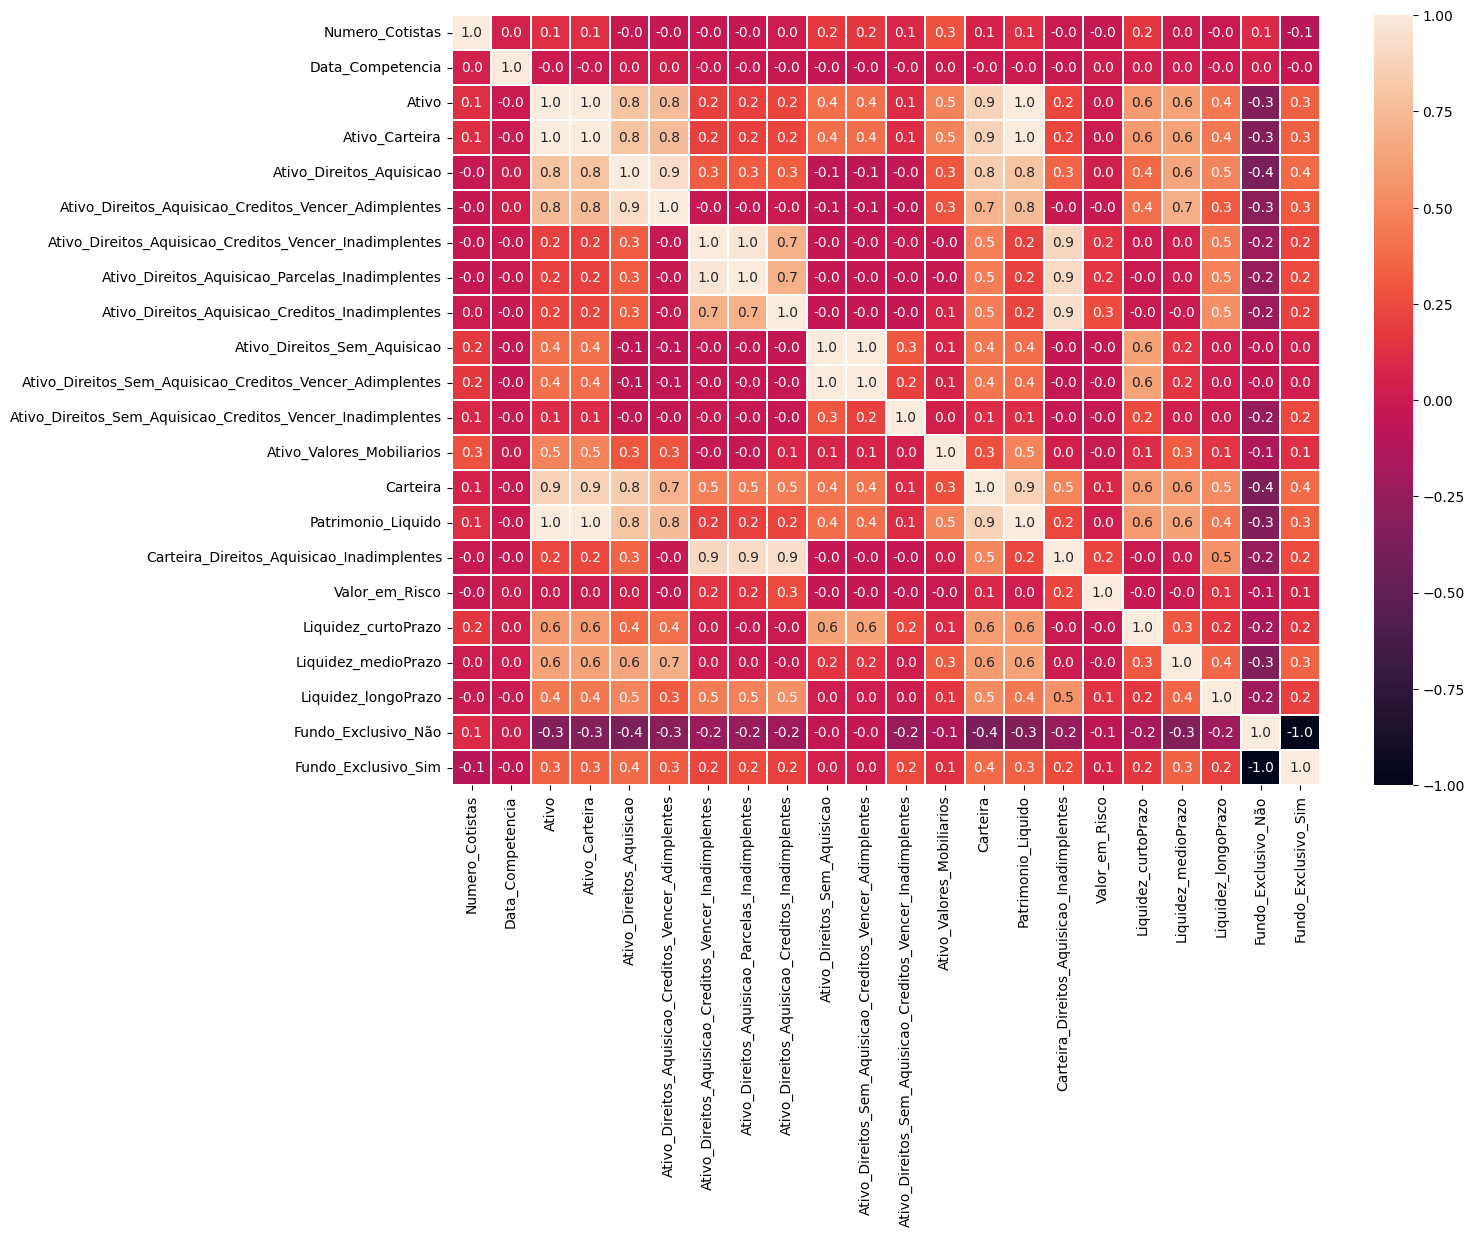

In [17]:
correlation = df.corr()
plt.figure(figsize=(14, 10))
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.1)
plot

In [21]:
dfp = df[["Data_Competencia", "Valor_em_Risco"]].copy()

# for index, linha in dfp.iterrows():
#     valor_em_risco = linha['Valor_em_Risco']
#     if pd.notna(valor_em_risco) and isinstance(valor_em_risco, (int, float)):
#         if valor_em_risco < 0.1:
#             dfp = dfp.drop(index, axis=0)
            
dfp.dropna(subset=["Data_Competencia","Valor_em_Risco"], inplace=True)

dfp = dfp.sort_values(by="Data_Competencia")
dfp = dfp.groupby("Data_Competencia").mean().reset_index()

In [22]:
dfp

,Data_Competencia,Valor_em_Risco
0,2019-11-30,0.048210
1,2019-12-31,0.056767
2,2020-01-31,0.044379
3,2020-02-29,0.050942
4,2020-03-31,0.050987
5,2020-04-30,0.056127
6,2020-05-31,0.059885
7,2020-06-30,0.057411
8,2020-07-31,0.047209
9,2020-08-31,0.047251


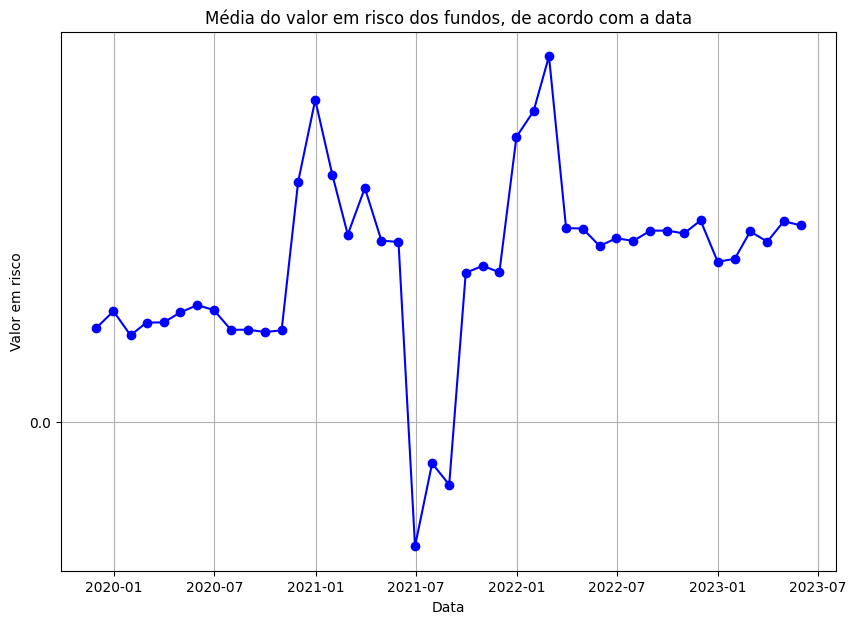

: 

In [23]:
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.title("Média do valor em risco dos fundos, de acordo com a data")
plt.xlabel("Data")
plt.ylabel("Valor em risco")

valores_y = [i * 1.5 for i in range(-50, 50)]
plt.yticks(valores_y)

plt.plot(dfp["Data_Competencia"], dfp["Valor_em_Risco"], marker='o', linestyle='-', color='b', label='Dados de Exemplo')

plt.show()



#### Clusterização

Tratamento dos dados para clusterização

In [ ]:
dft = df[['Ativo','Valor_em_Risco']].copy()

for index, linha in dft.iterrows():
    if linha['Valor_em_Risco'] < 0.1:
        dft = dft.drop(index, axis=0)

dft.dropna(subset=['Ativo','Valor_em_Risco'], inplace=True)

Fazendo o algorítimo para clusterização

In [ ]:
#dados_com_indice = dft.reset_index()[['index', 'Valor_em_Risco']].values
dados = dft[['Ativo', 'Valor_em_Risco']].values

K = 3
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42)
kmeans.fit(dados)

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


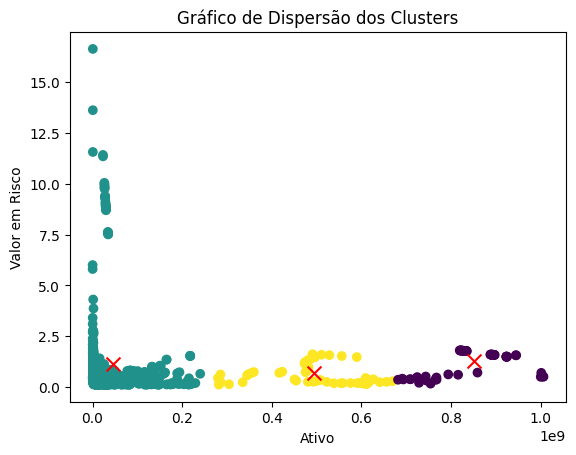

In [ ]:
plt.scatter(dft["Ativo"], dft['Valor_em_Risco'], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=100)
plt.xlabel('Ativo')
plt.ylabel('Valor em Risco')
plt.title('Gráfico de Dispersão dos Clusters')
plt.show()

In [ ]:
df = df.drop("Data_Competencia",axis=1)

#### Separando dados para treino e teste

In [ ]:
scaler = MinMaxScaler()
df = df.dropna()

X = df.copy()
X = X.drop("Valor_em_Risco",axis=1)
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

Y = df["Valor_em_Risco"]
Y = Y.values.reshape(-1, 1)
Y = scaler.fit_transform(Y)
Y = pd.DataFrame(Y)

[Train_X, Test_X,Train_Y, Test_Y] = train_test_split(X,Y, test_size=0.3)

#### Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True, max_features=8)

rf.fit(Train_X,Train_Y)
pred_rf = rf.predict(Test_X)

mse_rf = mean_squared_error(Test_Y, pred_rf)
print("Erro Quadrático Médio (MSE):", mse_rf)

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Erro Quadrático Médio (MSE): 3.663917589138401e-06


#### KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=49)

knn.fit(Train_X,Train_Y)
pred_knn = knn.predict(Test_X)

mse_knn = mean_squared_error(Test_Y, pred_knn)
print("Erro Quadrático Médio (MSE):", mse_knn)

Erro Quadrático Médio (MSE): 0.00015098785793513593


#### Analise fundos quebrados

##### Separação dos nomes dos fundos quebrados

In [ ]:
fundos_quebrados = ['FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS INDIGO BARTER',
                    'SB CRÉDITO FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS NÃO PADRONIZADOS MULTISSETORIAL',
                    'CAPTALYS FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS NÃO PADRONIZADOS - MAIS LOTES',
                    'FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS BRAVA CHALLENGE',
                    'CREDIHOME FUNDO DE INVESTIMENTO EM DIREITOS CREDITORIOS',
                    'SAFIRA FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS NÃO PADRONIZADOS',
                    'RUBI FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS MULTISETORIAL',
                    'FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS BULLLA',
                    'LS INTERBANK FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS',
                    'MANGALARGA FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS NÃO-PADRONIZADOS',
                    'TURQUESA - FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS',
                    'ÔNIX FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS NÃO PADRONIZADO',
                    'RAVENNA FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS NÃO PADRONIZADOS',
                    ]

##### criação de tabela só com esses fundos

In [ ]:
df_fq = df_fq[df_fq['Nome_Fundo'].isin(fundos_quebrados)]
df_fq

NameError: name 'df_fq' is not defined

In [ ]:
df_fq["Valor_em_Risco"] = df_fq["Ativo_Direitos_Aquisicao_Creditos_Vencer_Inadimplentes"]/df_fq["Patrimonio_Liquido"]
df_fq1 = df_fq.loc[(df_fq.Valor_em_Risco > 0)]

##### analise do valor de risco desses fundos

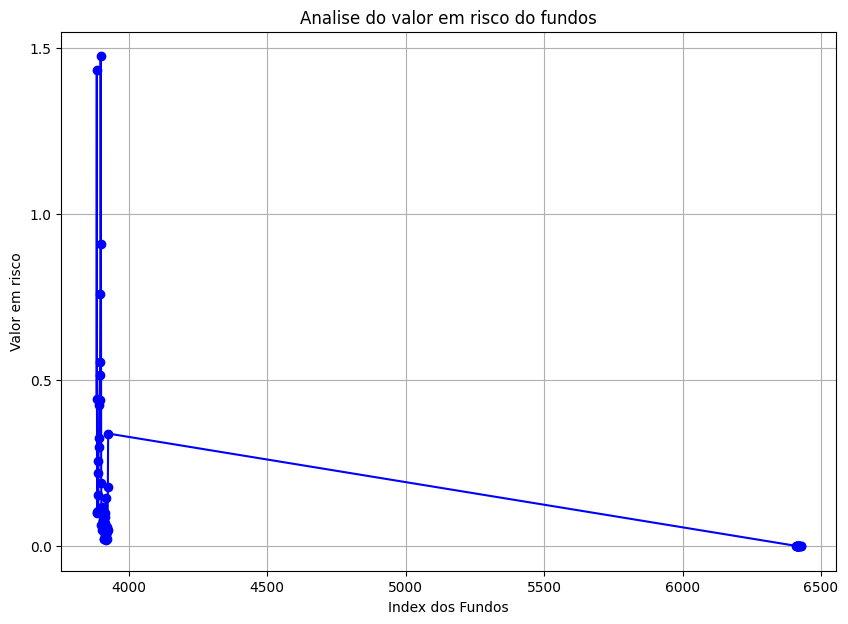

In [ ]:
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.title("Analise do valor em risco do fundos")
plt.xlabel("Index dos Fundos")
plt.ylabel("Valor em risco")

valores_y = [i * 0.50 for i in range(0, 50)]
plt.yticks(valores_y)

plt.plot(df_fq1.index, df_fq1["Valor_em_Risco"], marker='o', linestyle='-', color='b', label='Dados de Exemplo')

plt.show()

##### clusterização desses fundos

In [ ]:
df_fqt = df_fq[['Ativo', 'Valor_em_Risco']].copy()

for index, linha in df_fqt.iterrows():
    if linha['Valor_em_Risco'] == 0:
        df_fqt = df_fqt.drop(index, axis=0)

df_fqt.dropna(subset=['Ativo', 'Valor_em_Risco'], inplace=True)

In [ ]:
dados = df_fqt[['Ativo', 'Valor_em_Risco']].values

K = 4
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42)
kmeans.fit(dados)

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


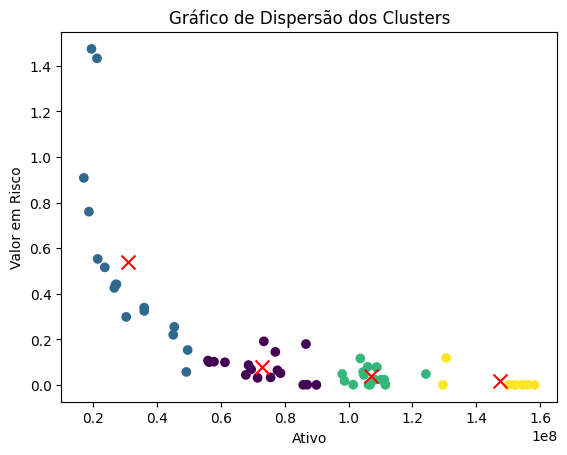

In [ ]:
plt.scatter(df_fqt['Ativo'], df_fqt['Valor_em_Risco'], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=100)
plt.xlabel('Ativo')
plt.ylabel('Valor em Risco')
plt.title('Gráfico de Dispersão dos Clusters')
plt.show()